In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

#from library.sb_utils import save_file

In [2]:
import pandas as pd
import os
import pickle
    
    
# This utility was created because students were getting confused when they ran 
# their notebooks twice, the previous write-to-file code would do nothing and say  
# nothing. The students thought the file was over-written when in fact, it was not -
# generating hidden bugs in subsequent notebooks.

def save_file(data, fname, dname):
    """Save a datafile (data) to a specific location (dname) and filename (fname)
    
    Currently valid formats are limited to CSV or PKL."""
    
    if not os.path.exists(dname):
        os.mkdir(dname)
        print(f'Directory {dname} was created.')
        
    fpath = os.path.join(dname, fname)
    
    
    if os.path.exists(fpath):
        print("A file already exists with this name.\n")

        yesno = None
        while yesno != "Y" and yesno != "N":
            yesno = input('Do you want to overwrite? (Y/N)').strip()[0].capitalize()
            if yesno == "Y":
                print(f'Writing file.  "{fpath}"')
                _save_file(data, fpath)
                break  # Not required
            elif yesno == "N":
                print('\nPlease re-run this cell with a new filename.')
                break  # Not required
            else:
                print('\nUnknown input, please enter "Y" or "N".')

    else:  # path does not exist, ok to save the file
        print(f'Writing file.  "{fpath}"')
        _save_file(data, fpath)
        
        
        
        
        
        
def _save_file(data, fpath):
    valid_ftypes = ['.csv', '.pkl']
    
    assert (fpath[-4:] in valid_ftypes), "Invalid file type.  Use '.csv' or '.pkl'"

    # Figure out what kind of file we're dealing with by name
    if fpath[-3:] == 'csv':
        data.to_csv(fpath, index=False)
    elif fpath[-3:] == 'pkl':
        with open(fpath, 'wb') as f:
            pickle.dump(data, f)
            

In [3]:
#     Library thing to save file did now work again
#     Opening data from previous step..

ski_data = pd.read_csv(r"C:\Users\Martin\Desktop\casa\my_guided_capstone\ski_data_step3_features2.csv")

#I have to drop first column unnamed

ski_data.drop(columns=['Unnamed: 0'], inplace=True)

# There was an infitiniy in the data that I had to retroactively take out

ski_data.loc[222,'resort_terrain_park_state_ratio'] = 0

ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [4]:
# isolating our resort 
big_mountain = ski_data[ski_data.Name == 'Big Mountain Resort']
big_mountain.T

,124
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastSixes,0
fastQuads,3
quad,2


In [5]:
# take out our resort from data 
ski_data.shape

(277, 36)

In [6]:
ski_data = ski_data[ski_data.Name != 'Big Mountain Resort']
ski_data.shape

(276, 36)

In [7]:
#train/test split - 70%/30%   what would be the size?
len(ski_data) * .7, len(ski_data)*.3

(193.2, 82.8)

In [8]:
# First argument is the x and then next argument is the y, 
# test_size = proportion of the dataset to include in the test split.
# random_state = Pass an int for reproducible output across multiple function calls
X_train, X_test, y_train, y_test = train_test_split(ski_data.drop(columns='AdultWeekend'), 
                                                    ski_data.AdultWeekend, test_size=0.3, 
                                                    random_state=47)

In [9]:
# see if it worked for X (all the columns except AdultWeekend [40])
X_train.shape, X_test.shape

((193, 35), (83, 35))

In [10]:
#now see if y worked (should only be one comlumn which is the price of ticket)
y_train.shape, y_test.shape

((193,), (83,))

In [11]:
#I have to drop first column unnamed

#ski_data.drop(columns=['Unnamed: 0'], inplace=True)
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio,total_chairs_runs_ratio,total_chairs_skiable_ratio,fastQuads_runs_ratio,fastQuads_skiable_ratio
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,0.414160,0.450867,0.706140,0.434783,0.000877,0.948276,0.092105,0.004348,0.026316,0.001242
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,0.414160,0.450867,0.280702,0.130435,0.000439,NaN,0.111111,0.006250,0.000000,0.000000
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,0.414160,0.450867,0.013158,0.434783,0.000439,0.051724,0.230769,0.100000,0.000000,0.000000
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,0.026595,1.754535,0.492708,0.514768,0.002536,NaN,0.145455,0.010296,0.000000,0.000000
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,0.026595,1.754535,0.507292,0.485232,0.001268,1.000000,0.107692,0.008750,0.015385,0.001250


In [12]:
#success!
#Save the 'Name', 'state', and 'Region' columns from the train/test data into names_train and names_test
#Then drop those columns from `X_train` and `X_test`. Use 'inplace=True'
#if it works shape should have 40-3 = 37 columns
names_list = ['Name', 'state', 'Region']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((193, 32), (83, 32))

In [13]:
# verify if all features are numeric
# They should all be int or float 
X_train.dtypes

summit_elev                             int64
vertical_drop                           int64
base_elev                               int64
trams                                   int64
fastSixes                               int64
fastQuads                               int64
quad                                    int64
triple                                  int64
double                                  int64
surface                                 int64
total_chairs                            int64
Runs                                  float64
TerrainParks                          float64
LongestRun_mi                         float64
SkiableTerrain_ac                     float64
Snow Making_ac                        float64
daysOpenLastYear                      float64
yearsOpen                               int64
averageSnowfall                       float64
projectedDaysOpen                     float64
NightSkiing_ac                        float64
resorts_per_state                 

In [14]:
X_test.dtypes

summit_elev                             int64
vertical_drop                           int64
base_elev                               int64
trams                                   int64
fastSixes                               int64
fastQuads                               int64
quad                                    int64
triple                                  int64
double                                  int64
surface                                 int64
total_chairs                            int64
Runs                                  float64
TerrainParks                          float64
LongestRun_mi                         float64
SkiableTerrain_ac                     float64
Snow Making_ac                        float64
daysOpenLastYear                      float64
yearsOpen                               int64
averageSnowfall                       float64
projectedDaysOpen                     float64
NightSkiing_ac                        float64
resorts_per_state                 

In [15]:
#Code task 4#
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

63.811088082901556

In [16]:
# see how good the mean is as a pedictor (compare above)
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train,y_train)
dumb_reg.constant_

array([[63.81108808]])

In [17]:
#Code task 6#
#Calculate the R^2 as defined above
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [18]:
#Make your predictions by creating an array of length the size of the training set
#with the single value of the mean.
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [19]:
#sklearn dummy regressor
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [20]:
#DummyRegressor produces exactly the same results and saves you having to mess about broadcasting the mean
r_squared(y_train, y_tr_pred)

0.0

In [21]:
#as expected, if you use the average value as your prediction, you get an
#of zero on our training set.
##                       np.ones() returns a bunch of ones which you can multiply by the mean 
y_te_pred = train_mean * np.ones(len(y_test))
#y_te_pred
r_squared(y_test, y_te_pred)



-0.0031235200417913944

In [22]:
#Mean Absolute Error
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [23]:
#using the mean again
mae(y_train, y_tr_pred)

17.923463717146785

In [24]:
mae(y_test, y_te_pred)

19.136142081278486

In [25]:
#Mean absolute error is arguably the most intuitive of all the metrics, this essentially tells you that,
#on average, you might expect to be off by around $19
#if you guessed ticket price based on an average of known values

In [26]:
#Mean Squared Error: simply the average of the square of the errors
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [27]:
mse(y_train, y_tr_pred)

614.1334096969057

In [28]:
mse(y_test, y_te_pred)

581.4365441953481

In [29]:
# ********Difference between y_tr_pred and y_te_pred is one matches the size of train 
# ********and the other matches the size of test

In [30]:
#we often take the square root, to form the root mean square error
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([24.78171523, 24.11299534])

In [31]:
#sklearn.metrics provides many commonly used metrics, included the ones above.

#R-squared

r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.0031235200417913944)

In [32]:
#Mean Absolute Error

mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)



(17.92346371714677, 19.136142081278486)

In [33]:
#Mean squared error

mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)



(614.1334096969046, 581.4365441953483)

In [34]:
# ****** When calling functions to calculate metrics, 
#  ****** it is important to take care in the order of the arguments.
# ****** you can check function syntax with func? in a code cell


# train set - sklearn
# correct order, incorrect order
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, -3.041041349306602e+30)

In [35]:
# test set - sklearn
# correct order, incorrect order
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)



(-0.0031235200417913944, 0.0)

In [36]:
# train set - using our homebrew function
# correct order, incorrect order
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

(0.0, -3.041041349306602e+30)

In [37]:
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

<ipython-input-17-fc28c3263e5e>:15: RuntimeWarning: divide by zero encountered in double_scalars
  R2 = 1.0 - sum_sq_res / sum_sq_tot


(-0.0031235200417913944, -inf)

In [38]:

#Impute missing values with median

#There's missing values. Recall from your data exploration that many distributions were skewed.

# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()
X_defaults_median

summit_elev                           2215.000000
vertical_drop                          750.000000
base_elev                             1300.000000
trams                                    0.000000
fastSixes                                0.000000
fastQuads                                0.000000
quad                                     1.000000
triple                                   1.000000
double                                   1.000000
surface                                  2.000000
total_chairs                             7.000000
Runs                                    28.000000
TerrainParks                             2.000000
LongestRun_mi                            1.000000
SkiableTerrain_ac                      170.000000
Snow Making_ac                          96.500000
daysOpenLastYear                       109.000000
yearsOpen                               57.000000
averageSnowfall                        120.000000
projectedDaysOpen                      115.000000


In [39]:
#Apply the imputation to both train and test splits

# assign median instead of NA's
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)




In [40]:
#As you have features measured in many different units, 
#with numbers that vary by orders of magnitude, 
#start off by scaling them to put them all on a consistent scale.
#The StandardScaler scales each feature to zero mean and unit variance.

#Code task 10#
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)



In [41]:
#Train the model on the train split

lm = LinearRegression().fit(X_tr_scaled, y_train)

In [42]:
#Make predictions using the model on both train and test splits


y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [43]:
# Asses model performance
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.8174368260404452, 0.7169322015271009)

In [44]:
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(8.55792784505212, 9.383085870670952)

In [45]:
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(112.11814450887051, 164.07347572730717)

In [46]:
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

summit_elev                           4074.554404
vertical_drop                         1043.196891
base_elev                             3020.512953
trams                                    0.103627
fastSixes                                0.072539
fastQuads                                0.673575
quad                                     1.010363
triple                                   1.440415
double                                   1.813472
surface                                  2.497409
total_chairs                             7.611399
Runs                                    41.188482
TerrainParks                             2.434783
LongestRun_mi                            1.293122
SkiableTerrain_ac                      448.785340
Snow Making_ac                         129.601190
daysOpenLastYear                       110.100629
yearsOpen                               56.559585
averageSnowfall                        162.310160
projectedDaysOpen                      115.920245


In [47]:
#fill the NA's with mean instead 

X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

In [48]:
#Scale the data

scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [49]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [50]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [51]:
#from above *median (0.8174368260404452, 0.7169322015271009)  **for comparison
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8168432601714744, 0.7104967164851531)

In [52]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.557329928849253, 9.430583165142066)

In [53]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(112.48267313986129, 167.80365063423693)

In [54]:
#to help speed up this process lets create a function
#that performed the sequence of steps:

#    impute missing values
 #   scale the features
  #  train a model
   # calculate model performance
# most important and useful components of sklearn is the pipeline.

    #replace missing values with the median for each feature
    #scale the data to zero mean and unit variance
    #train a linear regression model

In [55]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [56]:
type(pipe)

sklearn.pipeline.Pipeline

In [57]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [58]:
#Fit the pipeline

#Here, a single call to the pipeline's fit() method combines
#the steps of learning the imputation (determining what values to use to fill the missing ones),
#the scaling (determining the mean to subtract and the variance to divide by),
#and then training the model. It does this all in the one call with the training data as arguments.


In [59]:
#Code task 15#
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [60]:
#Make predictions on the train and test sets

y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)



In [61]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

# out: (0.8177988515690604, 0.7209725843435142)

(0.8174368260404452, 0.7169322015271009)

In [62]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

#out: (8.547850301825427, 9.40702011858132)

#Compare with your earlier result:

(8.55792784505212, 9.383085870670952)

In [63]:
median_mae

(8.55792784505212, 9.383085870670952)

In [64]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(112.11814450887051, 164.07347572730717)

In [65]:
#compare with earlier result 
median_mse

(112.11814450887051, 164.07347572730717)

In [66]:
# refining linear model

#model was overfitting. Alot features blindly used. 
#sklearn has a number of feature selection functions available. 
#SelectKBest selects the k best features. f_regression is the score function you're using 


In [67]:
# Define Pipeline
#Code task 16#
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [68]:
# Fit the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x000002CB82A064C0>)),
                ('linearregression', LinearRegression())])

In [69]:
#  Assess performance on the train and test set

y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [70]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7674914326052744, 0.6259877354190834)

In [71]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.501495079727484, 11.201830190332055)

In [72]:
#This has made things worse! Clearly selecting a subset of features has an impact on performance.
#SelectKBest defaults to k=10. You've just seen that 10 is **worse than** using all features.
#What is the best k? You could create a new pipeline with a different value of k:

In [73]:
#Code task 17#
#Modify the `SelectKBest` step to use a value of 15 for k
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression,k=15),
    LinearRegression()
)

In [74]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x000002CB82A064C0>)),
                ('linearregression', LinearRegression())])

In [75]:
#asses performance
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [76]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7924096060483825, 0.6376199973170797)

In [77]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.211767769307116, 10.488246867294356)

In [78]:
# Assessing performance using cross-validation

cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [79]:
cv_scores = cv_results['test_score']
cv_scores

array([0.63760862, 0.72831381, 0.74443537, 0.5487915 , 0.50441472])

In [80]:
np.mean(cv_scores), np.std(cv_scores)

(0.6327128053007864, 0.09502487849877701)

In [81]:
#obtain an estimate of the variability, or uncertainty, in your performance estimate
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.44, 0.82])

In [82]:
#make_pipeline automatically names each step as the lowercase name of the step 
#and the parameters of the step are then accessed by
#appending a double underscore followed by the parameter name

#Code task 18#
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [83]:
#range of k to investigate

k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [84]:
#find how many features is best.. automatically
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [85]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002CB82A064C0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [86]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [87]:
#Code task 19#
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 8}

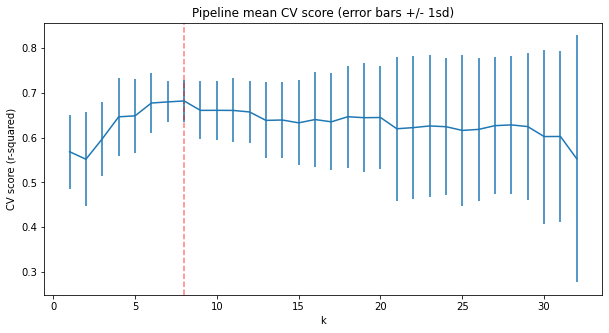

In [88]:
#suggests a good value for k is 8.
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [89]:
#Which features were most useful? 
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [90]:
#access the named step for the linear regression model and, from that, grab the model coefficients 
#Code task 21#
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(data = coefs, index= features).sort_values(ascending=False)

vertical_drop        10.767857
Snow Making_ac        6.290074
total_chairs          5.794156
fastQuads             5.745626
Runs                  5.370555
LongestRun_mi         0.181814
trams                -4.142024
SkiableTerrain_ac    -5.249780
dtype: float64

In [91]:
#vertical drop is your biggest positive feature

In [92]:
#Random Forest Model

# define pipeline

#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)


In [93]:
# Fit and assess performance using cross-validation

rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [94]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.69076185, 0.7918762 , 0.77778549, 0.6223757 , 0.63829317])

In [95]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.7042184827111594, 0.06974446033411175)

In [96]:
#Hyperparameter search using GridSearchCV

n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [97]:
#Random forest has a number of hyperparameters that can be explored,
#however here you'll limit yourselves to exploring some different values for the number of trees.

#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid= grid_params, cv=5, n_jobs=-1)

In [98]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [99]:
#Code task 26#
#It looks like imputing with the median helps, but scaling the features doesn't.

rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 69,
 'simpleimputer__strategy': 'median',
 'standardscaler': None}

In [100]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.6944363 , 0.81070631, 0.7708823 , 0.61917134, 0.67539976])

In [101]:
#You've marginally improved upon the default CV results

np.mean(rf_best_scores), np.std(rf_best_scores)

(0.7141192026162282, 0.06848770269911382)

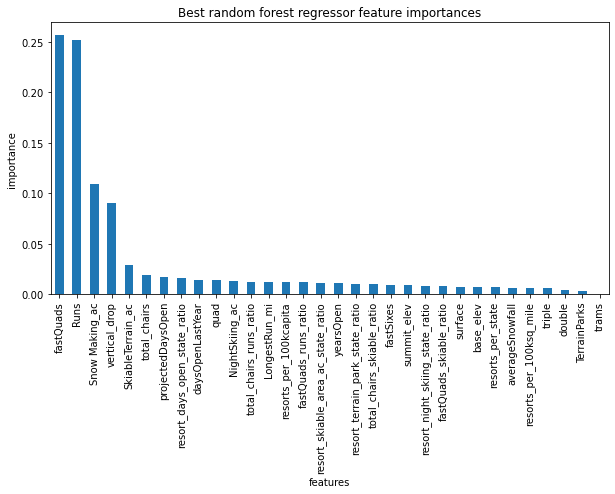

In [102]:
#the dominant top four features are in common with your linear model

plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [103]:
#Final Model Selection

# if features genuinely are not needed they should be removed. 
#Building a simpler model with fewer features can also have the advantage
#of being easier to sell (and/or explain) to stakeholders

# You built a best linear model and a best random forest model
# need to pick something that is at least better than guessing with the average 
#cross-validate defaults to the metric for scoring regression,
#you can specify the mean absolute error as an alternative via the scoring parameter.



In [104]:
#Linear Regression model performance

# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [105]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(10.499032338015294, 1.6220608976799664)

In [106]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

11.793465668669324

In [107]:
#Random forest regression model performance
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [108]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(9.666302274638658, 1.4886198493729166)

In [109]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

9.56074035271521

In [110]:

#The random forest model has a lower cross-validation mean absolute error by almost $1.
#It also exhibits less variability. 
#Verifying performance on the test set produces performance consistent with the cross-validation results.


In [111]:
#Would more data be useful? The learning_curve Assesses this trade off
#by seeing how performance varies with differing data set sizes

fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

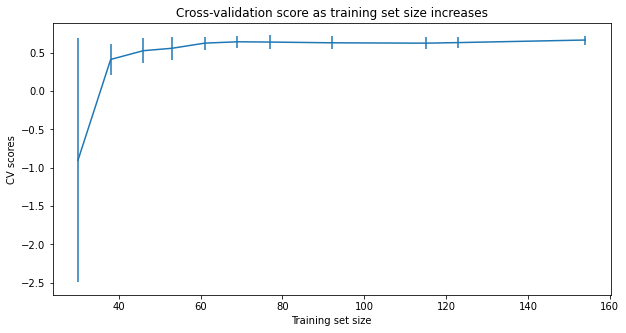

In [112]:
# graph it 
#essentially levelled off by around a sample size of 40-50.

plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

In [114]:
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_
best_model.version = 'random forest model pipe'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [116]:
#save the model

#filename = r'C:\Users\Martin\Desktop\casa\models\ski_resort_pricing_model.pkl'
#pickle.dump(best_model, open(filename, 'wb'))

In [118]:
#Try uncommenting in the first code block
#from library sb_utils import save_file

#in the beginning of Step 4 
#and use this following line to save the model:


modelpath = '../models'
save_file(best_model, 'ski_resort_pricing_model.pkl', modelpath)

Directory ../models was created.
Writing file.  "../models\ski_resort_pricing_model.pkl"


TypeError: cannot pickle 'module' object

In [ ]:

# Summary

#Q: 1 Write a summary of the work in this notebook.
#Capture the fact that you gained a baseline idea of performance
#by simply taking the average price and how well that did. 
#Then highlight that you built a linear model and the features that found.
#Comment on the estimate of its performance from cross-validation and 
#whether its performance on the test split was consistent with this estimate.
#Also highlight that a random forest regressor was tried, what preprocessing steps were found to be best,
#and again what its estimated performance via cross-validation was
#and whether its performance on the test set was consistent with that.
#State which model you have decided to use going forwards and why. 
#This summary should provide a quick overview for someone wanting to know quickly why
#the given model was chosen for the next part of the business problem to help guide important business decisions.

# A: We first devided the data into two parts, training and testing side. We then, as a baseline experiement,
#tested how well the mean could do a predictor. We decided whether to fill the NaN with median or mean. 
#We constructed a pipeline(previously we did step by step). We determined ideal number of features.
#we did both linear regression model vs. Random forest model and determined the random forest model was best
#finally, we wanted to see if it would be worthwile to get more data, but we determined that we had enough
